In [1]:
import keras
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

C:\Users\yoshihide\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [3]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [4]:
y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test, 10)

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total para

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD', metrics=['accuracy'])

In [9]:
history=model.fit(X_train, y_train, epochs=5,
                 validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 253s 4ms/step - loss: 0.5657 - acc: 0.8263 - val_loss: 0.1959 - val_acc: 0.9395
Epoch 2/5
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1694 - acc: 0.9478 - val_loss: 0.1250 - val_acc: 0.9607
Epoch 3/5
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1181 - acc: 0.9636 - val_loss: 0.1042 - val_acc: 0.9681
Epoch 4/5
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0930 - acc: 0.9711 - val_loss: 0.0815 - val_acc: 0.9731
Epoch 5/5
60000/60000 [==============================] - 234s 4ms/step - loss: 0.0786 - acc: 0.9758 - val_loss: 0.0711 - val_acc: 0.9776


In [10]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print('Test accurcy', test_acc)

10000/10000 [==============================] - 12s 1ms/step
Test accurcy 0.9776


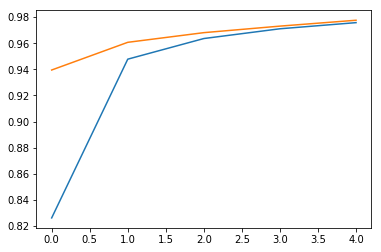

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()